# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import cohen_kappa_score

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Loading and cleaning the dataset

In [2]:
df = pd.DataFrame(pd.read_csv("Updated_Data.csv"))
del df[df.columns[0]]

In [3]:
df.head(5)

,datetime_local,short_title,popularity,score,Venue_id,latitude,longitude,Venue_name,average_price,highest_price,...,TaxiCount,LocationID,Month,DayofMonth,Hour,Temp_Avg,Conditions,Conditions2,timestamp,weekday
0,2017-07-05 14:00:00,Dear Evan Hansen - New York,0.000000,0.604179,3298,40.6971,-73.9796,Music Box Theatre,759.0,1126,...,33,65,7,5,14,82.4,Mostly Cloudy,4,7/5/2017 14:00,2
1,2017-07-05 14:00:00,"Hello, Dolly! - New York",0.692593,0.588942,3187,40.6971,-73.9796,Shubert Theatre,1007.0,1884,...,33,65,7,5,14,82.4,Mostly Cloudy,4,7/5/2017 14:00,2
2,2017-07-05 20:00:00,"Hello, Dolly! - New York",0.660295,0.647096,3187,40.6971,-73.9796,Shubert Theatre,972.5,1884,...,27,65,7,5,20,73.4,Clear,0,7/5/2017 20:00,2
3,2017-07-05 20:00:00,Dear Evan Hansen - New York,0.000000,0.601474,3298,40.6971,-73.9796,Music Box Theatre,668.0,825,...,27,65,7,5,20,73.4,Clear,0,7/5/2017 20:00,2
4,2017-07-05 23:00:00,Beatbreaker - New York,0.000000,0.452016,41977,40.7028,-73.9903,Marquee New York,0.0,0,...,18,66,7,5,23,73.4,Partly Cloudy,5,7/5/2017 23:00,2


In [4]:
newdf = df.dropna()

In [5]:
newdf.shape

(1814, 25)

In [6]:
newdf['popularity'] = (newdf['popularity']*100).astype(int)
newdf['score'] = (newdf['score']*100).astype(int)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
#Backing up
data = newdf
data.columns

Index([u'datetime_local', u'short_title', u'popularity', u'score', u'Venue_id',
       u'latitude', u'longitude', u'Venue_name', u'average_price',
       u'highest_price', u'listing_count', u'lowest_price',
       u'lowest_price_good_deals', u'type', u'type2', u'TaxiCount',
       u'LocationID', u'Month', u'DayofMonth', u'Hour', u'Temp_Avg',
       u'Conditions', u'Conditions2', u'timestamp', u'weekday'],
      dtype='object')

# Creating training and testing data sets

In [8]:
X = data[['popularity','score','Venue_id','average_price','highest_price','lowest_price','listing_count','lowest_price_good_deals','type2','Temp_Avg','Conditions2','LocationID','weekday','Month','DayofMonth','Hour']].astype(int)
Y = data['TaxiCount']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.90)

# Creating the Model

In [9]:
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
clf2 = RandomForestClassifier(n_estimators= 1000)
clf2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
clf3 = LogisticRegression()
clf3.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)
pred3 = clf3.predict(X_test)

# Results after prediction

In [13]:
actual_values = Y_test.reset_index()
del actual_values['index']
total = actual_values.shape[0]

In [14]:
t1 = 0
t2 = 0
t3 = 0

for i in range(len(pred1)):
    if(abs(pred1[i] - actual_values['TaxiCount'][i])) <= 10:
        t1 = t1 + 1
    if(abs(pred2[i] - actual_values['TaxiCount'][i])) <= 10:
        t2 = t2 + 1
    if(abs(pred3[i] - actual_values['TaxiCount'][i])) <= 10:
        t3 = t3 + 1
print ("DecisionTreeClassifier",t1, "Total", total)
print ("RandomForestClassifier",t2, "Total", total)
print ("LogisticRegression",t3, "Total", total)

('DecisionTreeClassifier', 167, 'Total', 182)
('RandomForestClassifier', 169, 'Total', 182)
('LogisticRegression', 127, 'Total', 182)


##### Random Forest Classifier correctly predicts the count of taxis for 171 events out of 182
##### Decision Tree Classifier correctly predicts the count of taxis for 170 events out of 18
##### Logistic Regression correctly predicts the count of taxis for 122 events out of 182

In [15]:
cohen_kappa_score(pred2, actual_values)

0.92206282690484198

# Enhancing the model using Grid Search CV

In [16]:
rfc = RandomForestClassifier(n_jobs=-1,max_features='auto',n_estimators=1000, oob_score = True) 

param_grid = { 
    'n_estimators': [100, 2000],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc,scoring='accuracy',param_grid=param_grid, cv=5)
CV_rfc.fit(X_train,Y_train)
print CV_rfc.best_params_
print '\n',CV_rfc.best_estimator_

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'max_features': 'sqrt', 'n_estimators': 2000}

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


In [17]:
dtc=DecisionTreeClassifier()
n_estimators = range(50, 400, 50)

parameters={
    "min_samples_split": [2, 10, 20],
    "max_depth": [None, 2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "max_leaf_nodes": [None, 5, 10, 20]
}

CV_dtc=GridSearchCV(estimator=dtc,scoring='accuracy',param_grid=parameters,cv=5)
CV_dtc.fit(X_train,Y_train)
print CV_dtc.best_params_
print CV_dtc.best_estimator_

{'min_samples_split': 2, 'max_leaf_nodes': None, 'max_depth': None, 'min_samples_leaf': 1}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [18]:
lr = LogisticRegression()
lr_param_grid = {'C':[0.001,0.01,0.1,1,10,1000]}

#param_grid = dict(solver = solver_options, multi_class = multi_class_options, class_weight = class_weight_options)
CV_lr = GridSearchCV(lr, lr_param_grid, cv = 5, scoring = 'accuracy')
CV_lr.fit(X_train, Y_train)
print CV_lr.best_params_
print '\n',CV_lr.best_estimator_

{'C': 1000}

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


# Creating the model using optimal parameters

In [19]:
rfc_cv = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
rfc_cv.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [37]:
lr_cv = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)
lr_cv.fit(X_train, Y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
dtc_cv = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dtc_cv.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
rfc_pred = rfc_cv.predict(X_test)
lr_pred = lr_cv.predict(X_test)
dtc_pred = dtc_cv.predict(X_test)

In [40]:
tlr = 0
trfc = 0
tdtc = 0
for i in range(len(rfc_pred)):
    if(abs(rfc_pred[i] - actual_values['TaxiCount'][i])) <= 10:
        trfc = trfc + 1
    if(abs(lr_pred[i] - actual_values['TaxiCount'][i])) <= 10:
        tlr = tlr + 1
    if(abs(dtc_pred[i] - actual_values['TaxiCount'][i])) <= 10:
        tdtc = tdtc + 1

print ("DecisionTreeClassifier",tdtc, "Total", total)
print ("RandomForestClassifier",trfc, "Total", total)
print ("LogisticRegression",tlr, "Total", total)

('DecisionTreeClassifier', 165, 'Total', 182)
('RandomForestClassifier', 170, 'Total', 182)
('LogisticRegression', 145, 'Total', 182)


#### As we see from the results, Random Forest gives the best result after Grid Search CV.

# Comparison of Actual vs Predicted Values

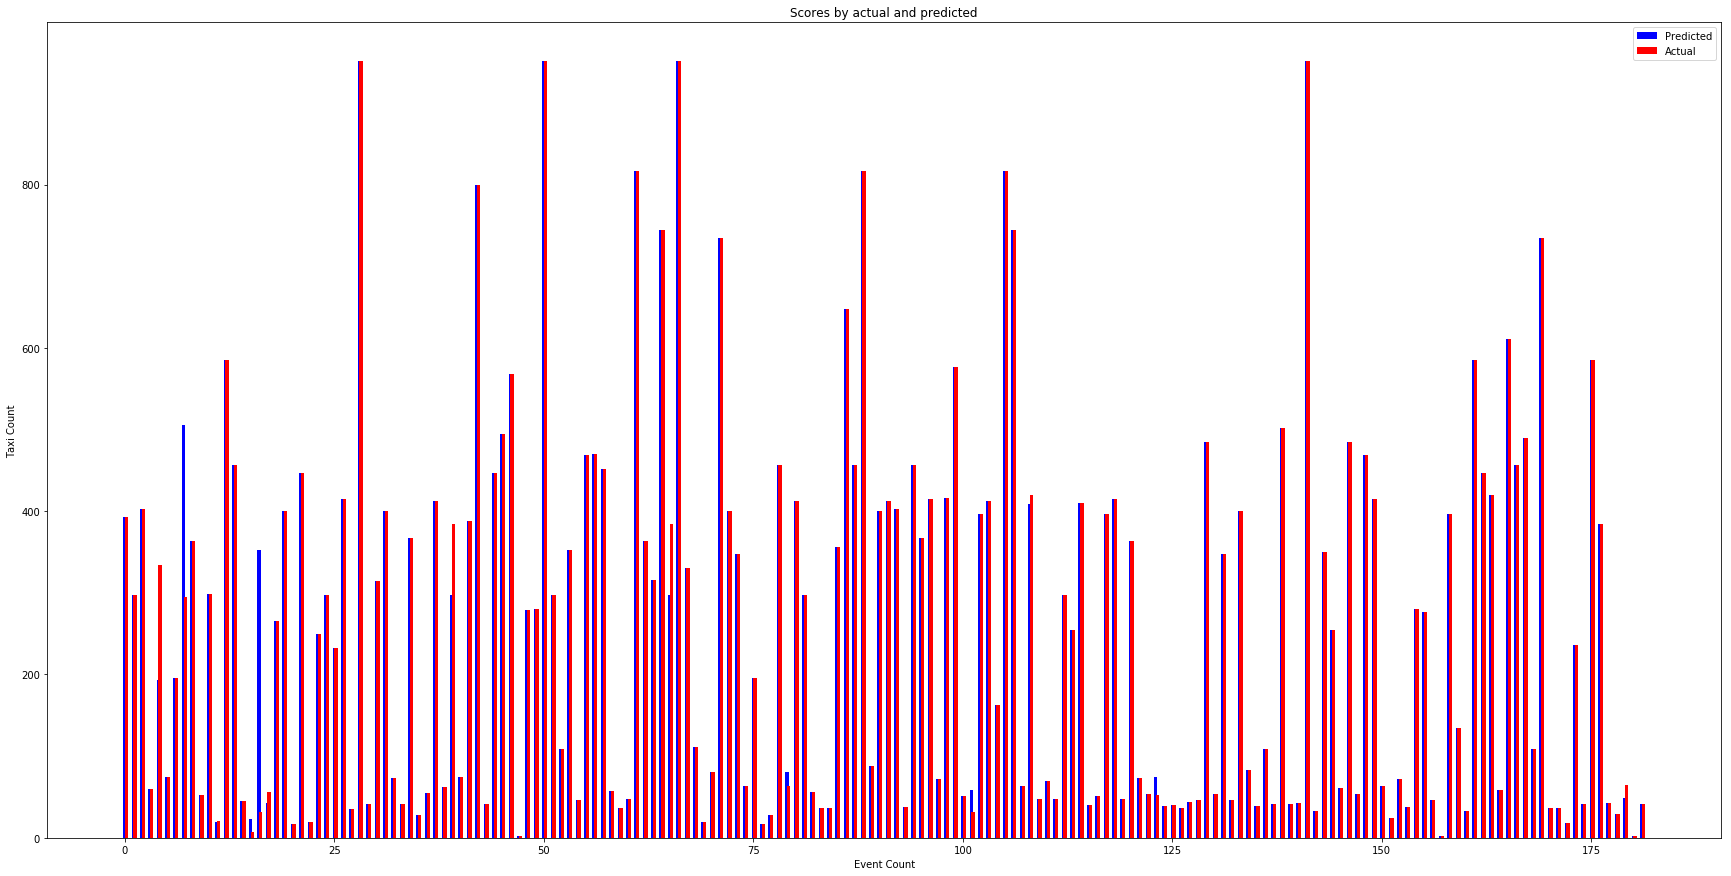

In [240]:
import numpy as np
import matplotlib.pyplot as plt
n_groups = 182

pred_val = rfc_pred

act_val = actual_values['TaxiCount']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.4

opacity = 0.4
rects1 = plt.bar(index, pred_val, bar_width, 
                 color='b',
                 label='Predicted')

rects2 = plt.bar(index+0.2, act_val, bar_width,
                 color='r',
                 label='Actual')

plt.xlabel('Event Count')
plt.ylabel('Taxi Count')
plt.title('Scores by actual and predicted')
plt.legend()
plt.rcParams["figure.figsize"] = (30, 8)
plt.show(fig)

# Checking how much Every parameter contributes

In [25]:
rfc_cv.feature_importances_

array([ 0.03024568,  0.0522892 ,  0.04043186,  0.06652635,  0.04316034,
        0.04872911,  0.05841709,  0.04342691,  0.01943532,  0.14118013,
        0.05234105,  0.08294678,  0.07012699,  0.05586881,  0.11054555,
        0.08432883])

In [26]:
n_groups1 = len(rfc_cv.feature_importances_)
values = rfc_cv.feature_importances_
index1 = ['popularity','score','Venue_id','average_price','highest_price','lowest_price','listing_count','lowest_price_good_deals','type2','Temp_Avg','Conditions2','LocationID','weekday','Month','DayofMonth','Hour']

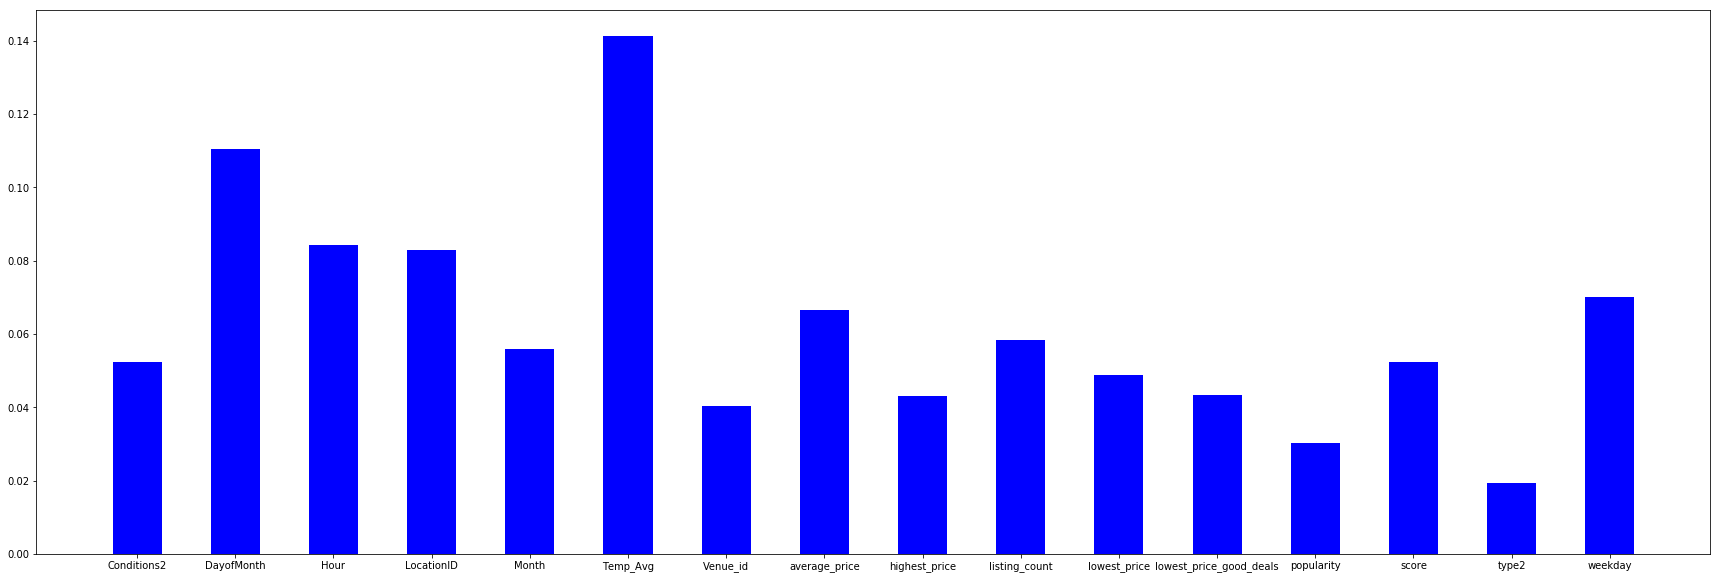

In [27]:
bar_width = 0.5
fig, ax = plt.subplots()
opacity = 0.4
rects3 = plt.bar(index1, values, bar_width, 
                 color='b',
                 label='Feature Importance')
plt.show(fig)
plt.rcParams["figure.figsize"] = (30, 8)

# Visualizations and Evaluation

In [28]:
from sklearn.metrics import confusion_matrix

In [144]:
y_true = actual_values['TaxiCount']
y_pred = rfc_pred
confusion_matrix(y_true, y_pred)

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 4]])

In [145]:
demand_rfc = []
demand_dtc = []
demand_lr = []
for i in range(len(actual_values)):
    if(abs(rfc_pred[i] - actual_values['TaxiCount'][i])) <= 10:
        demand_rfc.append(1)
    else:
        demand_rfc.append(0)
    if(abs(dtc_pred[i] - actual_values['TaxiCount'][i])) <= 10:
        demand_dtc.append(1)
    else:
        demand_dtc.append(0)
    if(abs(lr_pred[i] - actual_values['TaxiCount'][i])) <= 10:
        demand_lr.append(1)
    else:
        demand_lr.append(0)    

In [146]:
act_demand = [1]*len(demand_rfc)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
print("MSE of Random Forest Classifier", mean_squared_error(demand_rfc, act_demand))
print("MSE of Decision Tree Classsifier",mean_squared_error(demand_dtc, act_demand))
print("MSE of Logistic Regression",mean_squared_error(demand_lr, act_demand))

('MSE of Random Forest Classifier', 0.065934065934065936)
('MSE of Decision Tree Classsifier', 0.093406593406593408)
('MSE of Logistic Regression', 0.2032967032967033)


In [153]:
print("MSE of Random Forest Classifier", mean_squared_error(rfc_pred, act_val))
print("MSE of Decision Tree Classsifier",mean_squared_error(dtc_pred, act_val))
print("MSE of Logistic Regression",mean_squared_error(lr_pred, act_val))

('MSE of Random Forest Classifier', 1013.7362637362637)
('MSE of Decision Tree Classsifier', 1889.9615384615386)
('MSE of Logistic Regression', 11999.763736263736)


In [52]:
print("MSE",mean_squared_error(demand_dtc, act_demand))
print("R2",r2_score(y_true, y_pred))

('MSE', 0.093406593406593408)
('R2', -0.10303030303030325)


In [56]:
print("MSE",mean_squared_error(demand_lr, act_demand))
print("R2",r2_score(y_true, y_pred))

('MSE', 0.2032967032967033)
('R2', 0.98173612764499474)


In [99]:
a = np.arange(182)

In [115]:
X_test.columns

Index([u'popularity', u'score', u'Venue_id', u'average_price',
       u'highest_price', u'lowest_price', u'listing_count',
       u'lowest_price_good_deals', u'type2', u'Temp_Avg', u'Conditions2',
       u'LocationID', u'weekday', u'Month', u'DayofMonth', u'Hour'],
      dtype='object')

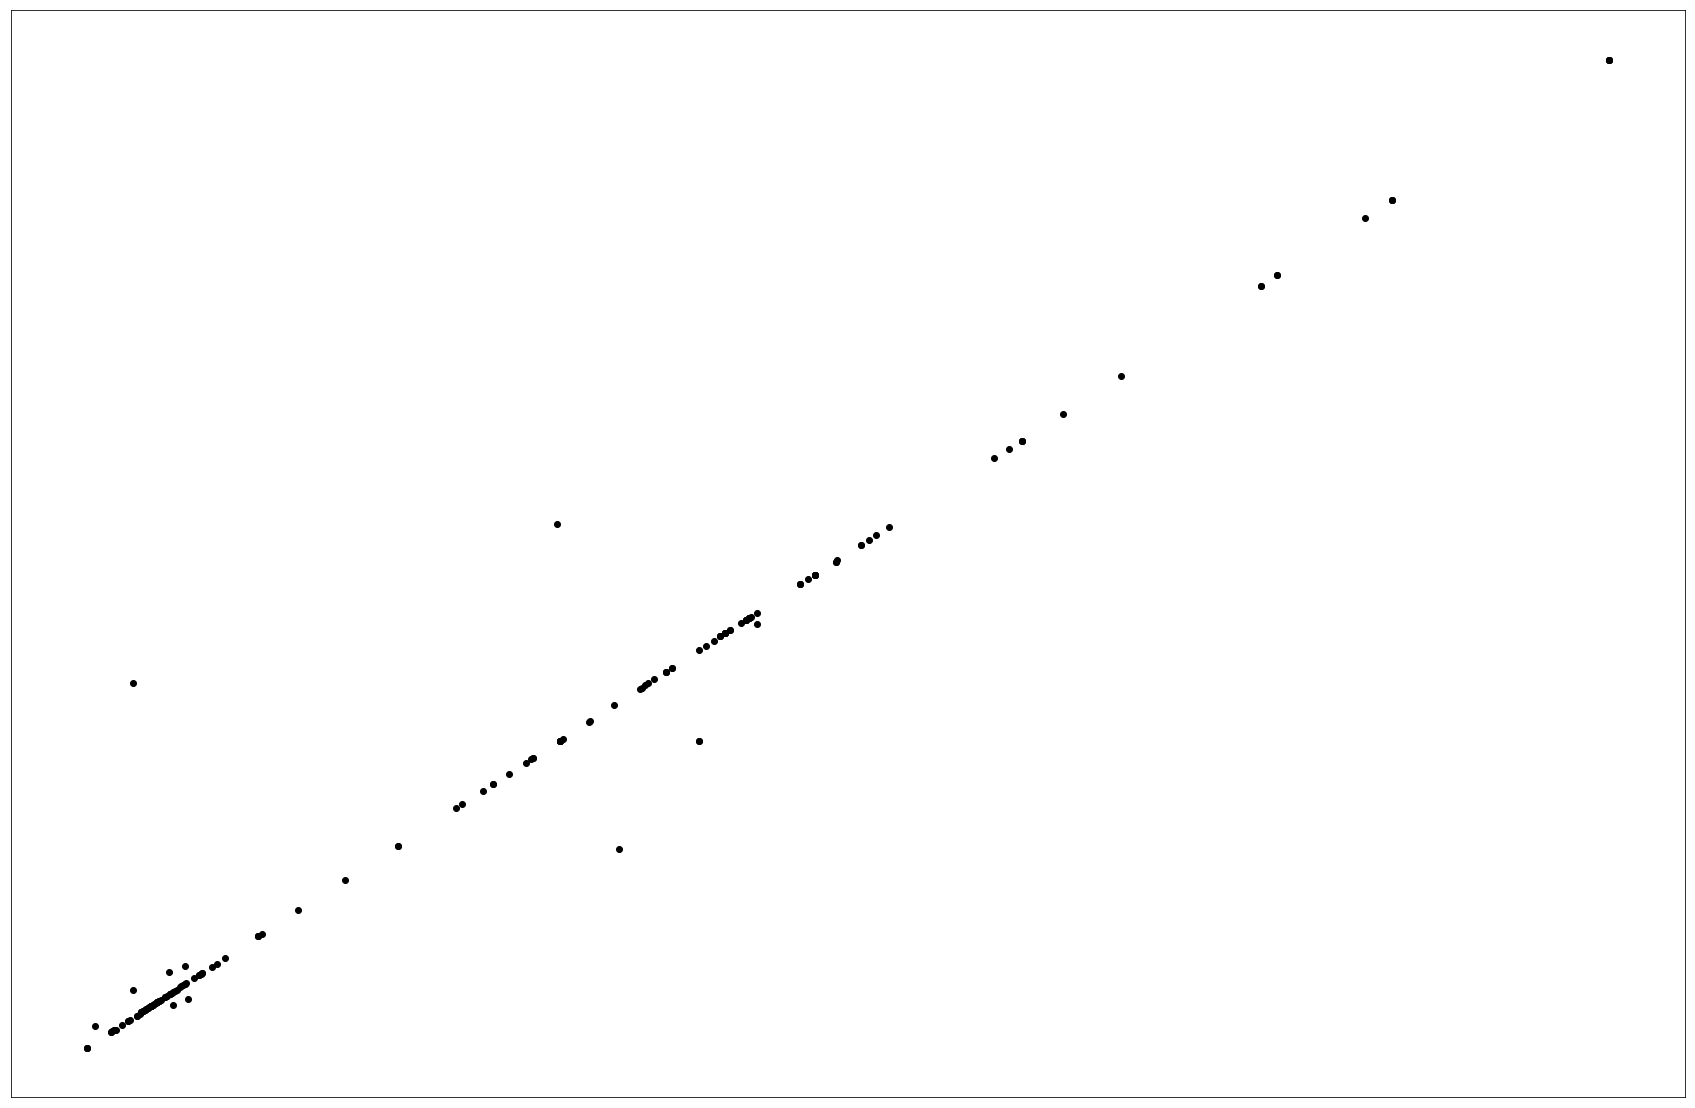

In [121]:
plt.scatter(y_true, rfc_pred,color = 'black')
#plt.plot(y_true ,rfc_pred, color = 'blue', linewidth =3)

plt.xticks(())
plt.yticks(())
plt.show()

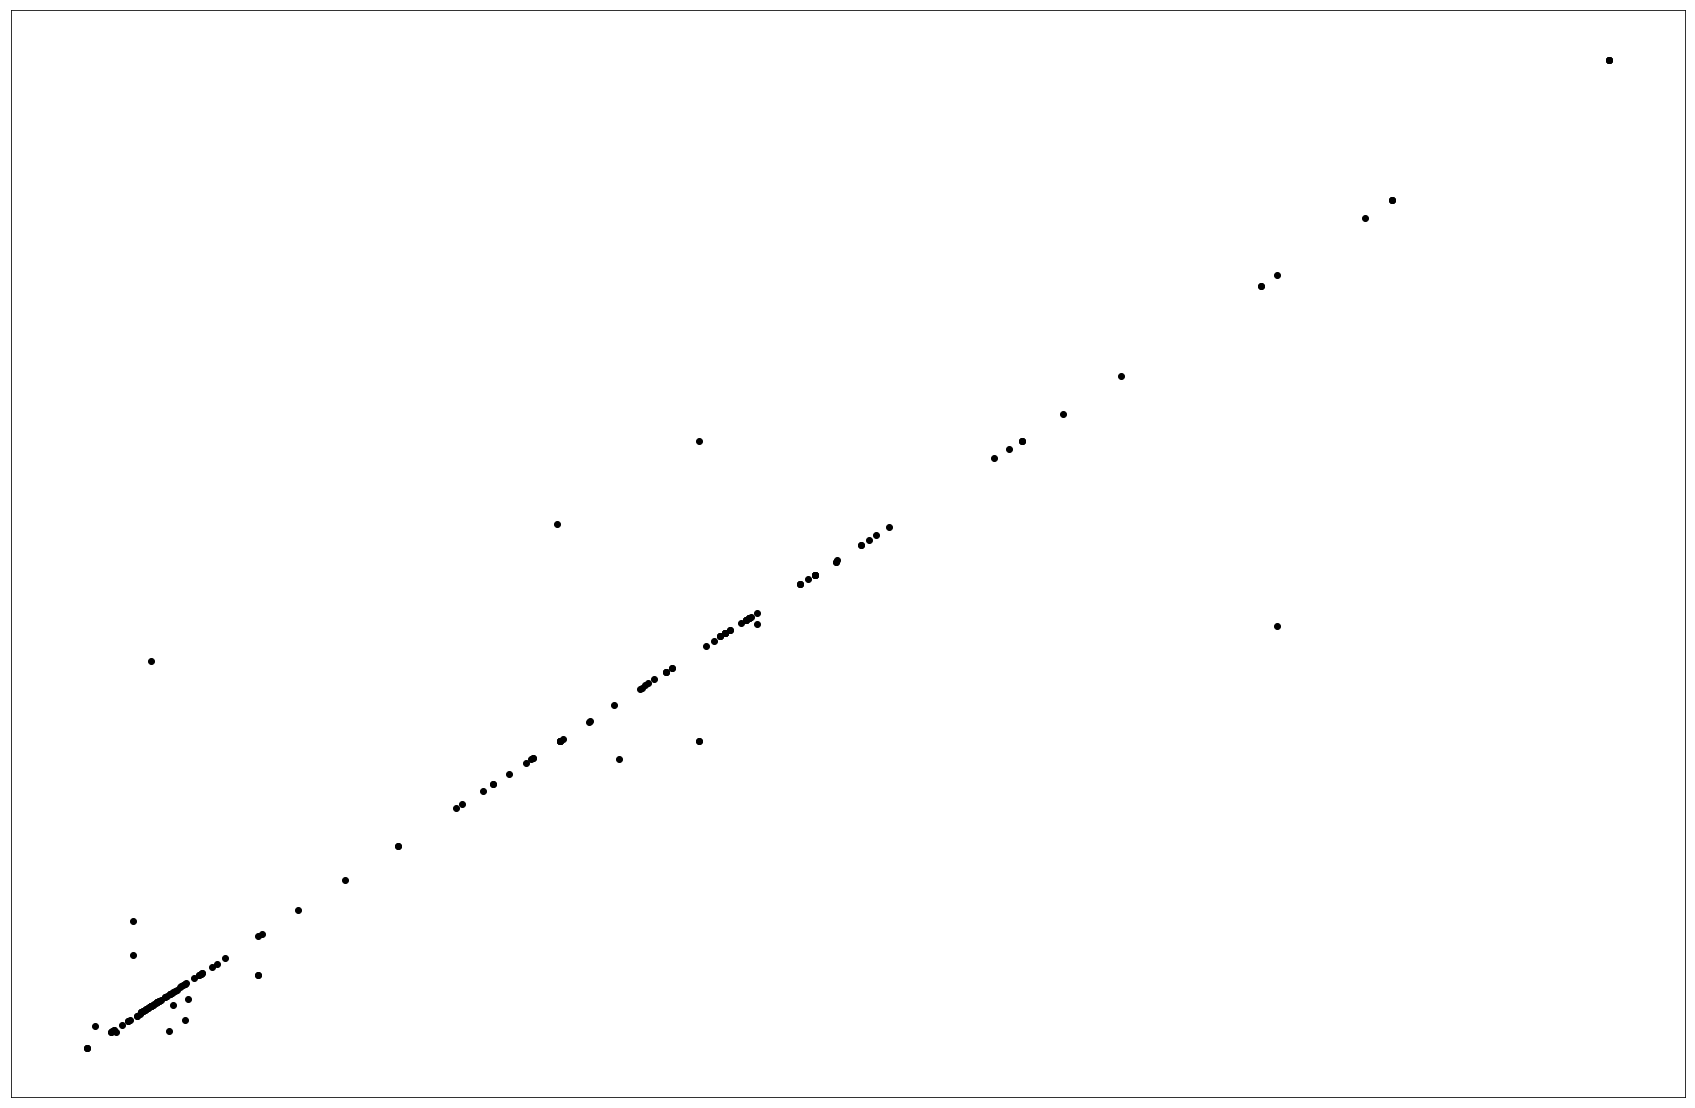

In [120]:
plt.scatter(y_true, dtc_pred,color = 'black')
#plt.plot(y_true ,rfc_pred, color = 'blue', linewidth =1)

plt.xticks(())
plt.yticks(())
plt.show()

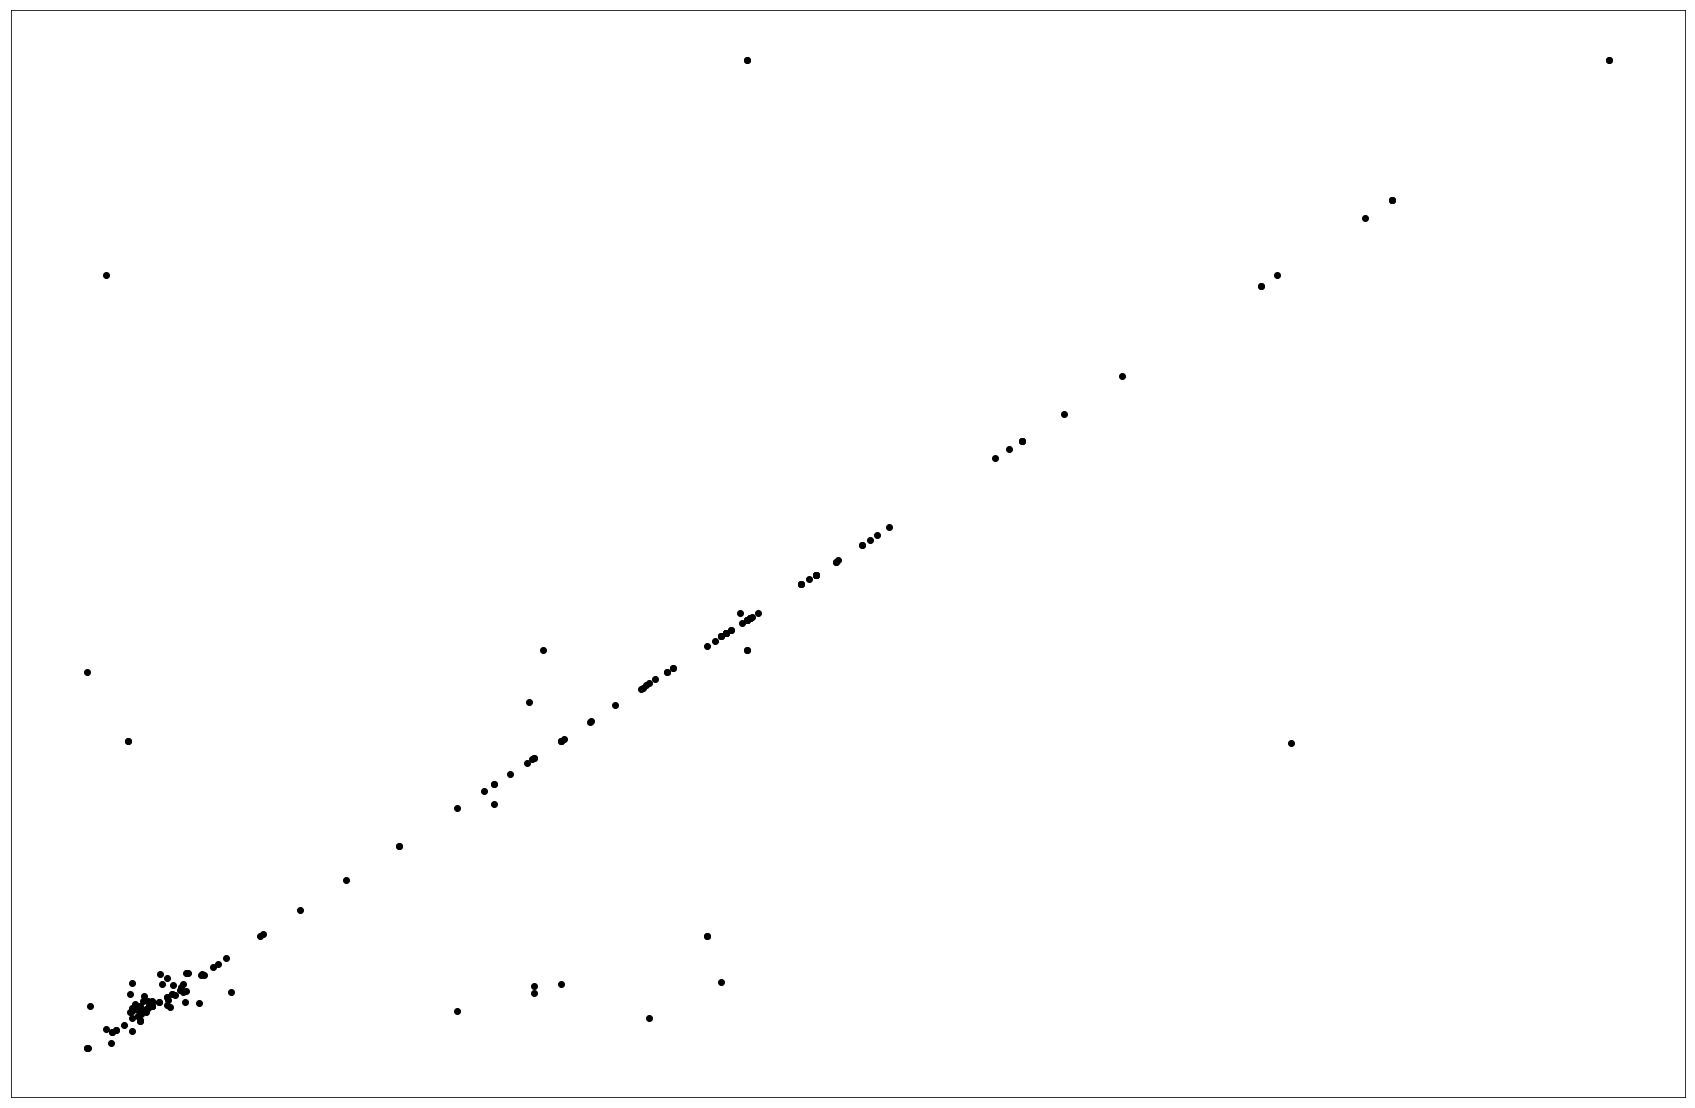

In [110]:
plt.scatter(lr_pred, y_true, color = 'black')
#plt.plot(y_true,y_pred, color = 'blue', linewidth =3)

plt.xticks(())
plt.yticks(())
plt.show()

In [68]:
import seaborn as sb

In [88]:
sb.heatmap(data.corr())

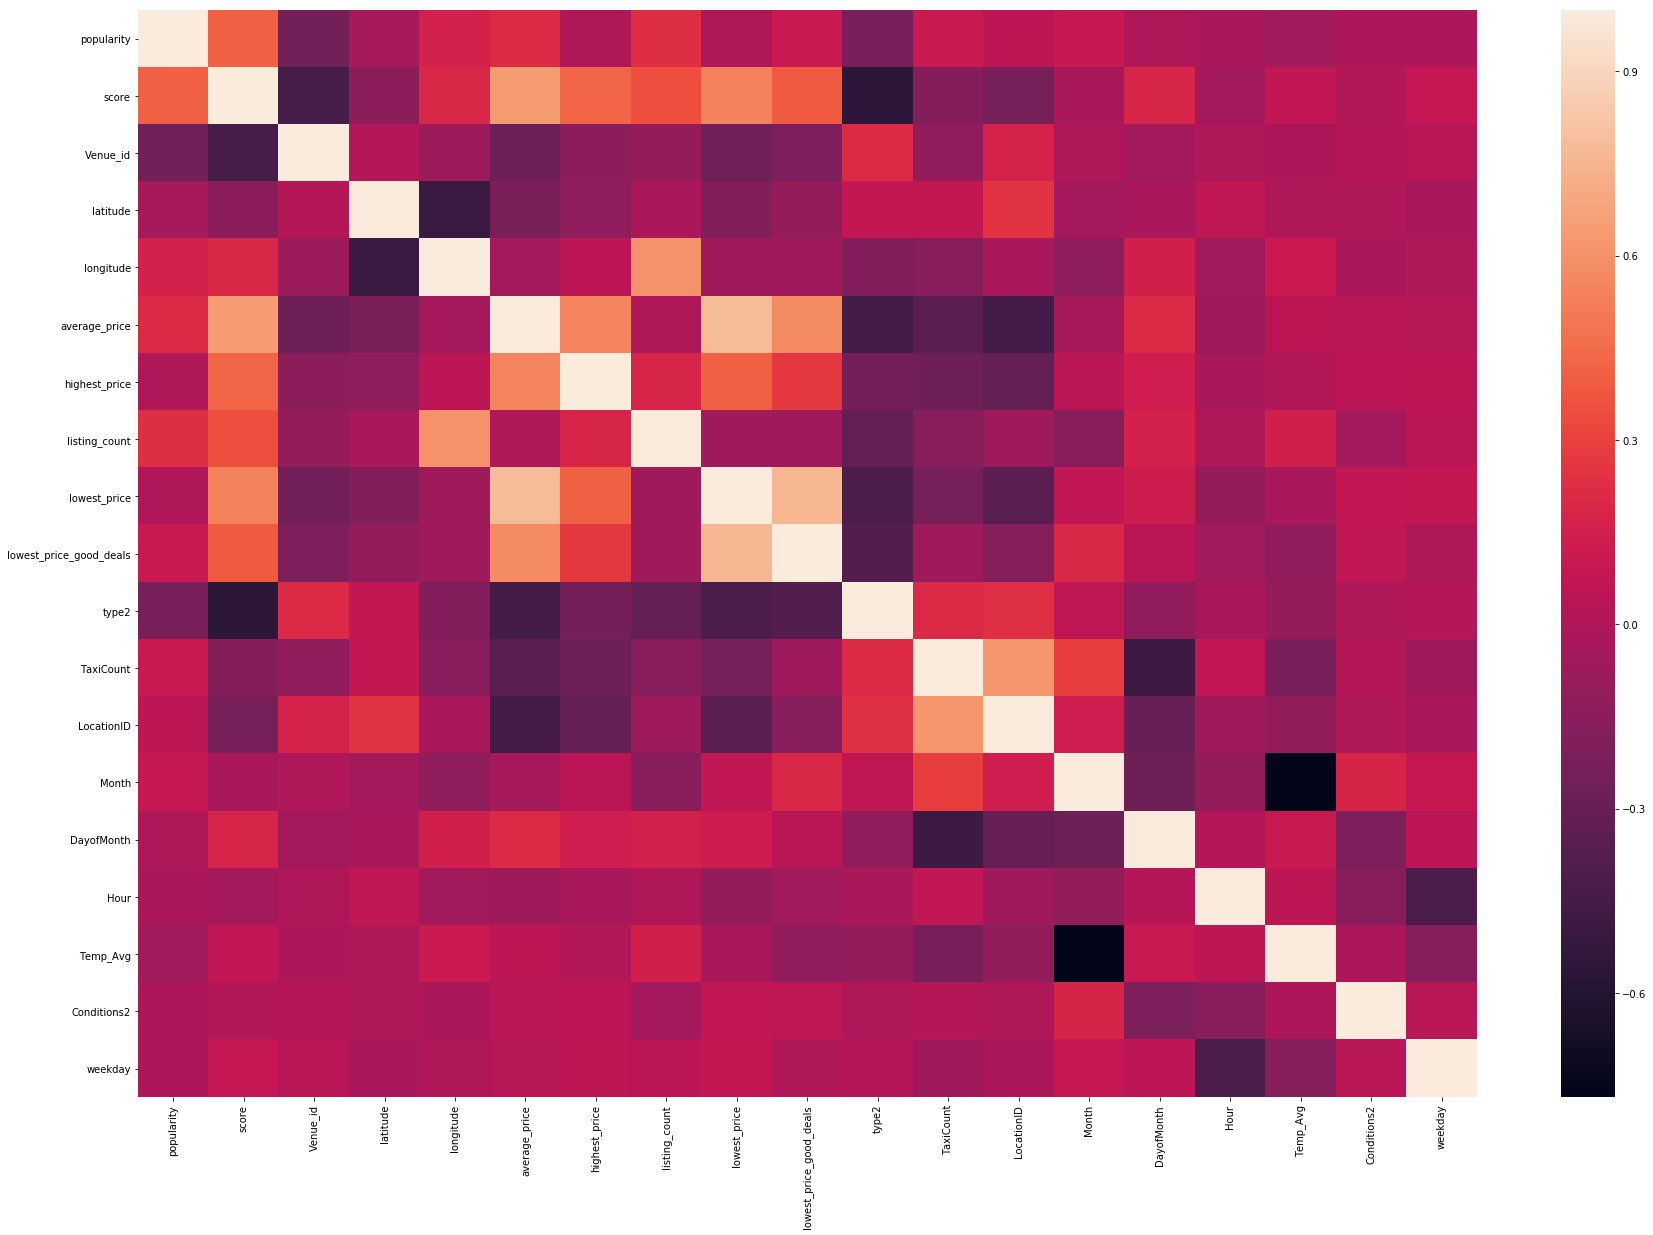

In [89]:
plt.show()

In [90]:
sb.heatmap(X.corr())

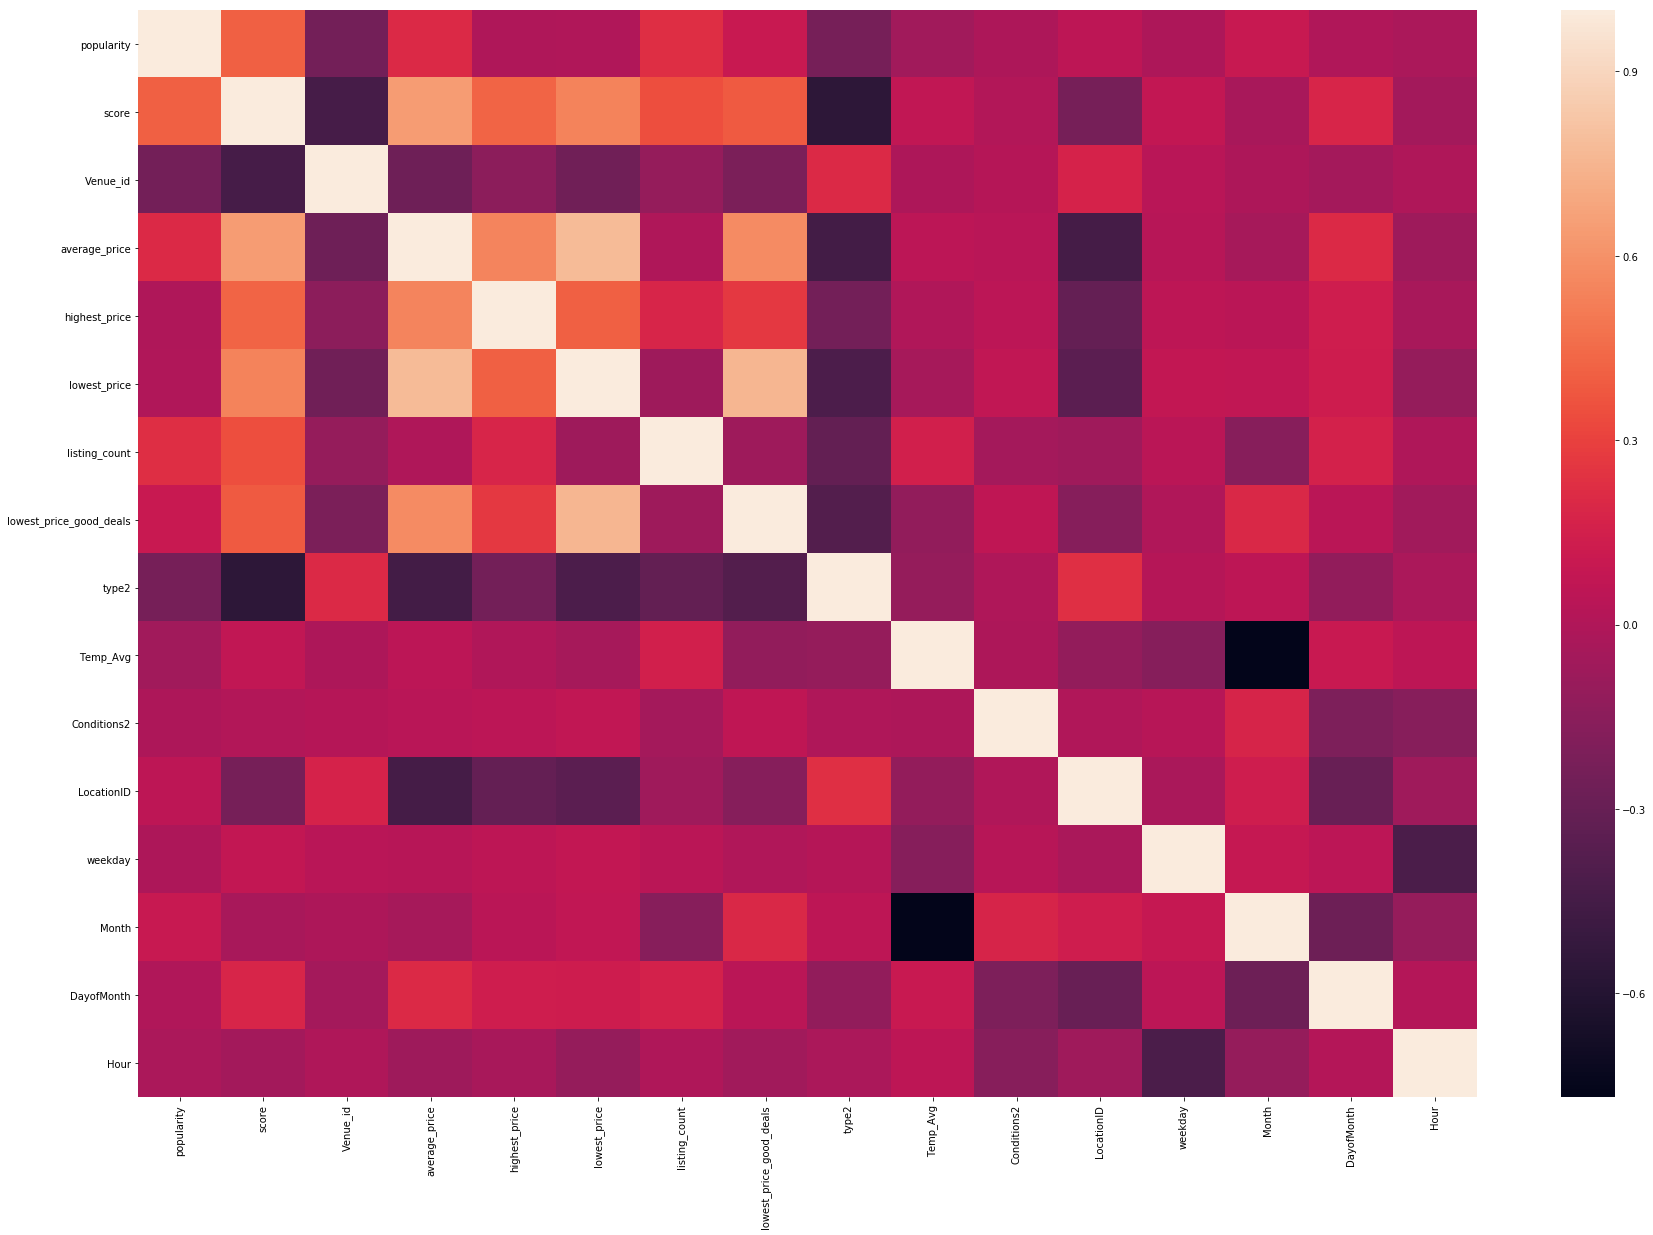

In [91]:
plt.show()

In [155]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(demand_rfc, act_demand)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.93


In [217]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(demand_dtc, act_demand)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.91


In [218]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(demand_lr, act_demand)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.80


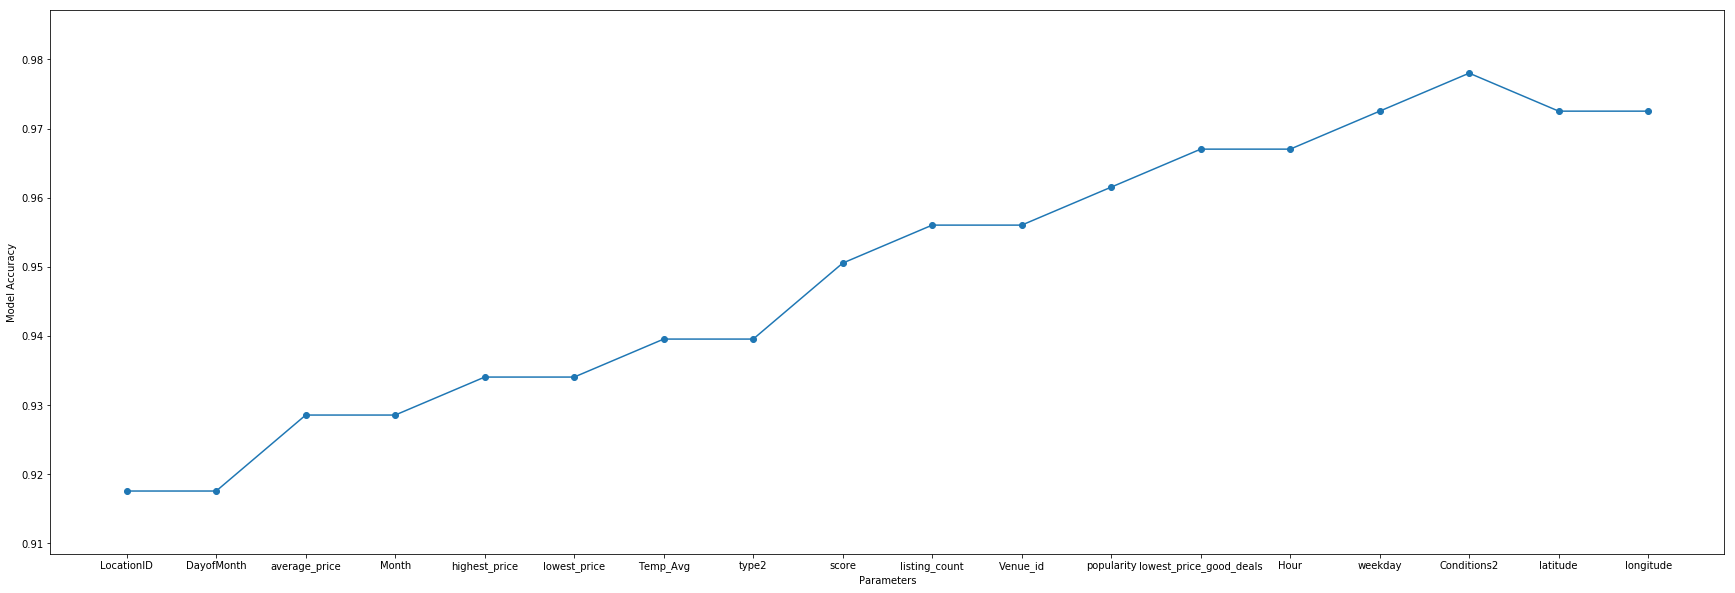

In [276]:
plt.scatter(x,y)
plt.plot(x, y)
labels = columns
plt.xticks(x, labels)

plt.xlabel('Parameters')
plt.ylabel('Model Accuracy')
plt.show()
plt.rcParams["figure.figsize"] = (30, 20)